In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
rating = pd.read_csv("/content/ratings.csv")
movie = pd.read_csv("/content/movies.csv")

## **Data Cleaning**

In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [5]:
rating['timestamp'] = pd.to_datetime(rating['timestamp'],unit='s')

In [6]:
rating.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [7]:
rating.duplicated().sum()

0

In [8]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [10]:
movie['title'] = movie['title'].str.strip()

In [11]:
movie['genres'] = movie['genres'].str.split('|')

In [12]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [13]:
movie.isna().sum()

,0
movieId,0
title,0
genres,0


In [14]:
# Merged Both Dataset
df = pd.merge(rating,movie[['movieId' , 'title' , 'genres']],on = 'movieId')
df.drop('timestamp' , axis = 1 , inplace =True)
df.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),"[Adventure, Children, Fantasy]"
1,5,2,3.0,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,13,2,3.0,Jumanji (1995),"[Adventure, Children, Fantasy]"
3,29,2,3.0,Jumanji (1995),"[Adventure, Children, Fantasy]"
4,34,2,3.0,Jumanji (1995),"[Adventure, Children, Fantasy]"


## **EDA**

In [15]:
no_ratings = len(rating)
no_movies = movie['movieId'].nunique()
movie_Watched = rating['movieId'].nunique()
no_users = rating['userId'].nunique()

print(f'Number of Rating : {no_ratings}')
print(f'Number of Movies : {no_movies}')
print(f'Number of Movies Watched : {movie_Watched}')
print(f'Number of Users : {no_users}')
print(f'Average number of ratings per user : {round(no_ratings/no_users , 2)}')
print(f'Average number of ratings per Movie : {round(no_ratings/movie_Watched , 2)}')

Number of Rating : 1048575
Number of Movies : 27278
Number of Movies Watched : 14026
Number of Users : 7120
Average number of ratings per user : 147.27
Average number of ratings per Movie : 74.76


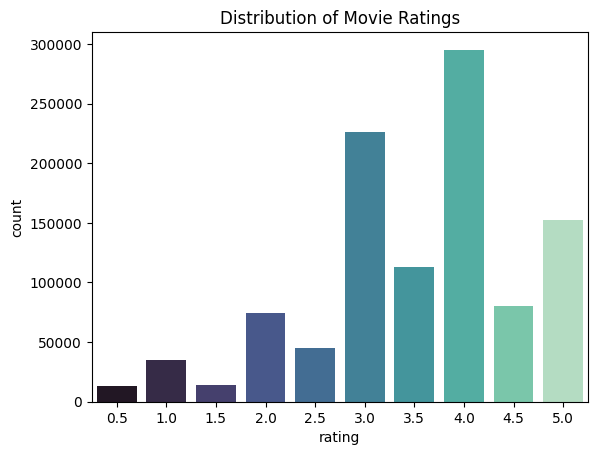

In [16]:
sns.countplot(x='rating' , data =rating , palette = 'mako')
plt.title('Distribution of Movie Ratings')
plt.show()

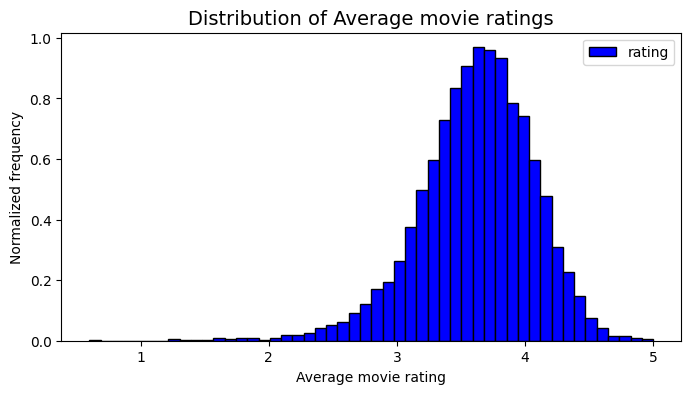

In [17]:
grdta=rating[['userId' , 'rating']].groupby('userId').mean()
#Plot_Histogram

grdta.plot(kind='hist',bins=50,grid=0,density=True,color='blue',edgecolor='black',figsize=(8,4))
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title("Distribution of Average movie ratings", fontsize=14)
plt.show()

In [18]:
# Mean Global rating
# Mean Rating by per user

print(f"Mean global rating: {round(rating['rating'].mean(),2)}")
mean_rating = rating.groupby('userId')['rating'].mean()
print(f"Mean Rating by Per User : {round(mean_rating.mean(),2)}")

Mean global rating: 3.53
Mean Rating by Per User : 3.62


In [19]:
# What are the Lowest Rating Users
most_rated = rating.groupby('userId')['rating'].agg(['count' , 'mean']).reset_index()
most_rated.columns=['User_Id','rating_Count','Mean_Rating']
most_rated.sort_values(by='rating_Count',ascending=False)[::-1].head()

,User_Id,rating_Count,Mean_Rating
7119,7120,20,4.125
4147,4148,20,2.975
4091,4092,20,3.700
4085,4086,20,3.650
4057,4058,20,2.900


In [20]:
rating['Day_Of_Week'] = rating.timestamp.dt.strftime('%A')

In [21]:
rating.head()

,userId,movieId,rating,timestamp,Day_Of_Week
0,1,2,3.5,2005-04-02 23:53:47,Saturday
1,1,29,3.5,2005-04-02 23:31:16,Saturday
2,1,32,3.5,2005-04-02 23:33:39,Saturday
3,1,47,3.5,2005-04-02 23:32:07,Saturday
4,1,50,3.5,2005-04-02 23:29:40,Saturday


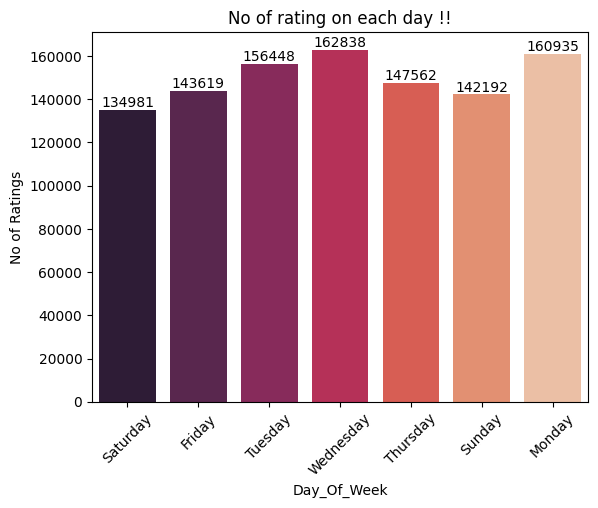

In [22]:
# Number of Rating on Each day of a week

ax=sns.countplot(data=rating,x='Day_Of_Week' , palette = 'rocket')
plt.title('No of rating on each day !!')
plt.ylabel('No of Ratings')
plt.xticks(rotation=45)

for bar in ax.containers:
  ax.bar_label(bar)

plt.show()

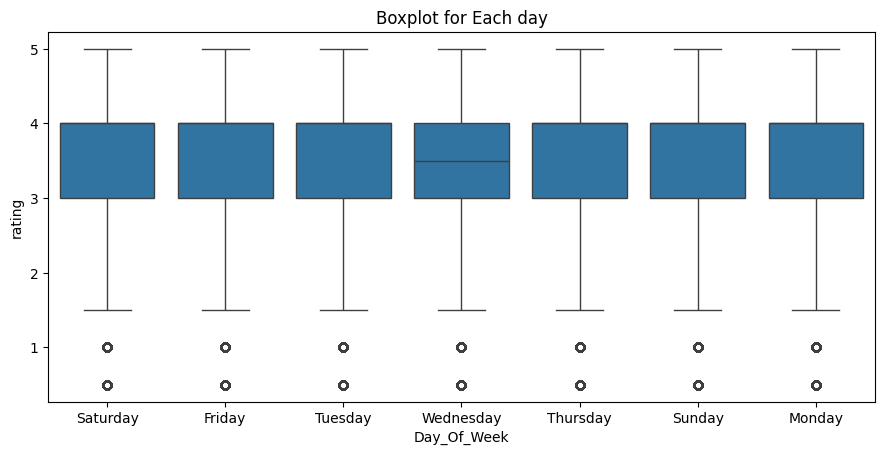

In [23]:
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating',x='Day_Of_Week',data=rating)
plt.title('Boxplot for Each day')
plt.show()

In [24]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


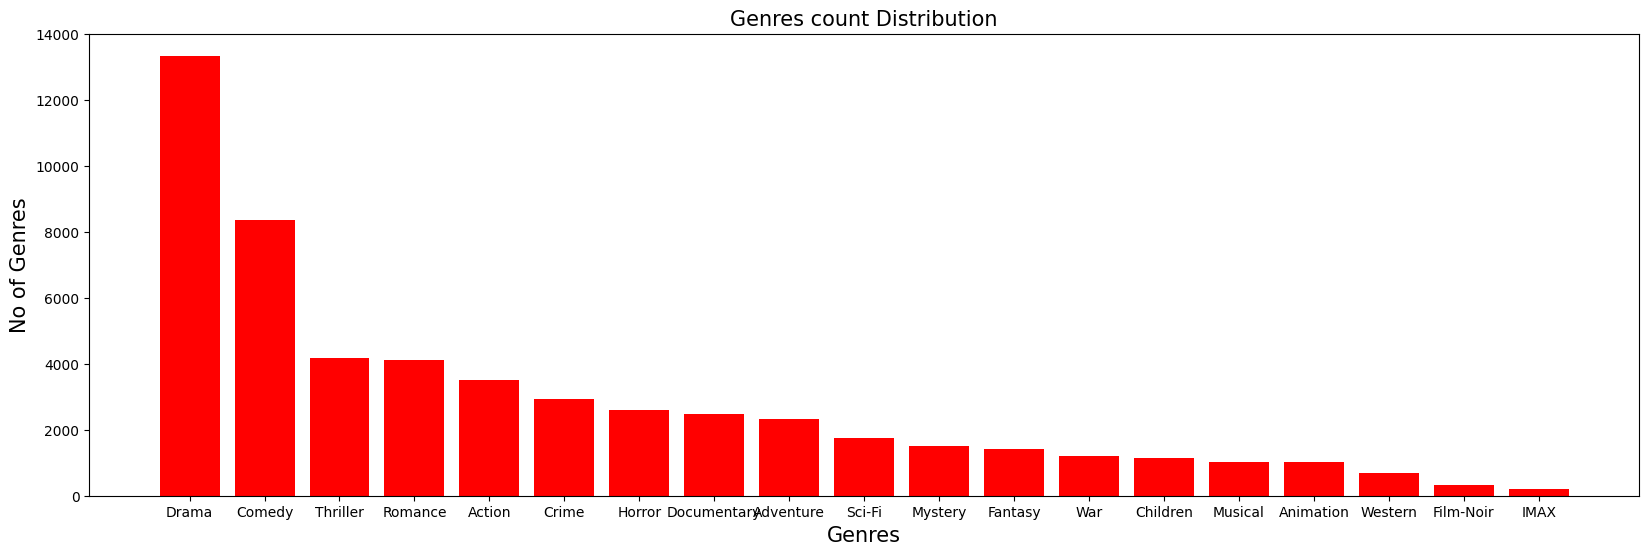

In [25]:
# Most Popular genres of movie release
plt.figure(figsize=(20,6))
genreslist = movie['genres']
genres_count={}
for genres in genreslist:
  for g in genres:
    if g in genres_count:
      genres_count[g]+=1
    else:
      genres_count[g]=1

genres_count.pop("(no genres listed)")
genres_count=dict(sorted(genres_count.items(),key=lambda x: x[1],reverse=True))

plt.bar(genres_count.keys(),genres_count.values(),color='red')
plt.title('Genres count Distribution',fontdict={'fontsize':15})
plt.xlabel('Genres',fontdict={'fontsize':15})
plt.ylabel('No of Genres',fontdict={'fontsize':15})
plt.show()

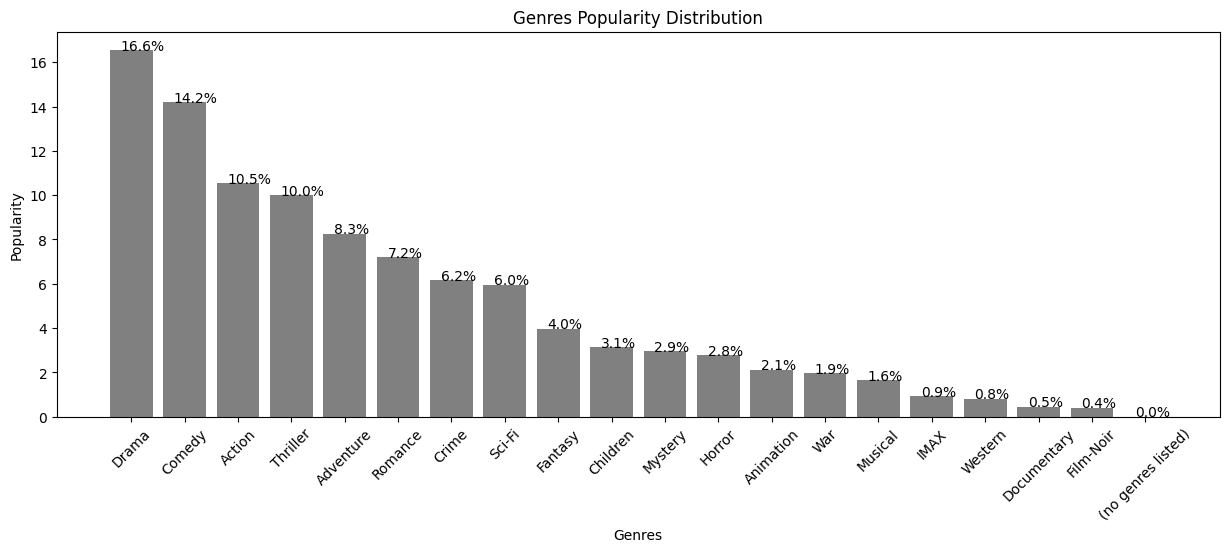

In [26]:
# Most rated genres of Movies

genreslist = df['genres']
genres_count = {}
for genres in genreslist:
  for g in genres:
    if g in genres_count:
      genres_count[g]+=1
    else:
      genres_count[g]=1

genres_count=dict(sorted(genres_count.items(),key=lambda x:x[1],reverse=True))


most_rated_genres_df=pd.DataFrame(genres_count.items(),columns=['genres','count'])
most_rated_genres_df['Popularity']=most_rated_genres_df['count']/most_rated_genres_df['count'].sum()*100

plt.figure(figsize=(15,5))
plt.bar(most_rated_genres_df['genres'],most_rated_genres_df['Popularity'],color='grey')
plt.title('Genres Popularity Distribution')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=45)


for index,value in enumerate(most_rated_genres_df['Popularity']):
    plt.text(index-.2,value,str(round(value,1))+'%')

plt.show()

In [27]:
# Find what genre Movies has recieved the best and wrost ratings based on User Rating.

min=df[df['rating']==df['rating'].min()]
genreslist = min['genres']
genre_count_min = {}

for genres in genreslist:
  for g in genres:
    if g in genre_count_min:
      genre_count_min[g]+=1
    else:
      genre_count_min[g]=1

dict(sorted(genre_count_min.items(),key=lambda x:x[1],reverse=True))

{'Comedy': 5920,
 'Action': 4091,
 'Drama': 3549,
 'Thriller': 3147,
 'Adventure': 3071,
 'Sci-Fi': 2563,
 'Romance': 2229,
 'Horror': 1948,
 'Fantasy': 1589,
 'Children': 1577,
 'Crime': 1490,
 'Animation': 765,
 'Mystery': 759,
 'Musical': 639,
 'War': 411,
 'IMAX': 343,
 'Documentary': 213,
 'Western': 184,
 'Film-Noir': 64}

In [28]:
# 3.Find what Genre Movies have received the best and worst ratings based on User Rating.


gmax=df[df['rating']==df['rating'].max()]
genres_list=gmax['genres']
genre_max_count={}

for genres in genres_list:
  for g in genres:
    if g in genre_max_count:
      genre_max_count[g]+=1
    else:
      genre_max_count[g]=1

dict(sorted(genre_max_count.items(),key=lambda x:x[1],reverse=True))

{'Drama': 78226,
 'Comedy': 50873,
 'Action': 37239,
 'Thriller': 36859,
 'Adventure': 32181,
 'Crime': 29822,
 'Romance': 29761,
 'Sci-Fi': 21711,
 'Fantasy': 15824,
 'Mystery': 13337,
 'War': 12174,
 'Children': 10954,
 'Animation': 8824,
 'Horror': 8495,
 'Musical': 7199,
 'IMAX': 3654,
 'Western': 3533,
 'Film-Noir': 2762,
 'Documentary': 2208}

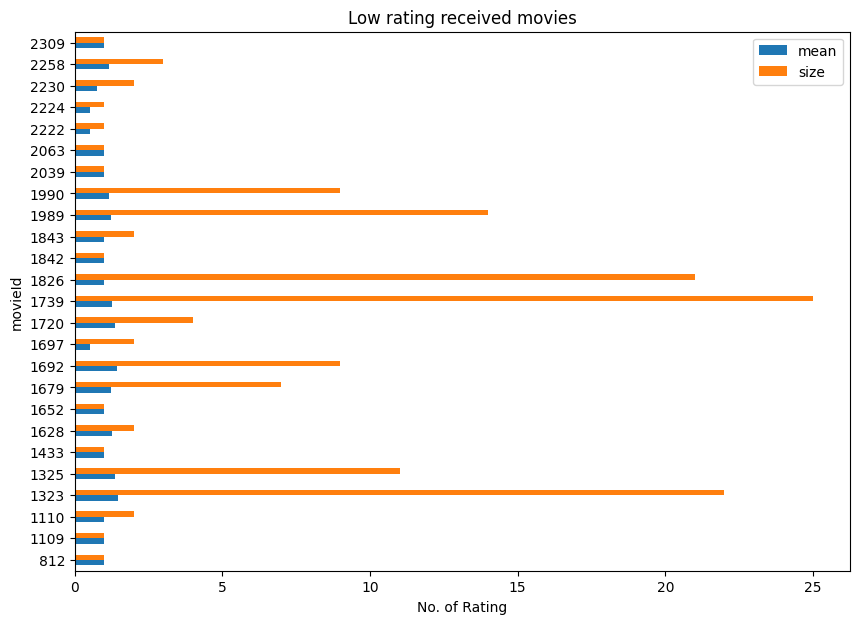

In [29]:
# Low Rated Movie

Rated_movie_Grouped = df.groupby('movieId')['rating'].agg([np.mean,np.size])
low_rated_Movie = Rated_movie_Grouped['mean']<1.5
Low_Rated = Rated_movie_Grouped[low_rated_Movie]
Low_Rated.head(25).plot(kind='barh',figsize=(10,7))
plt.title('Low rating received movies')
plt.xlabel('No. of Rating')
plt.show()

In [30]:
# Most Popular Movie

rating_mean_count = pd.DataFrame(df.groupby(['title'])[['rating']].agg({'rating':['mean','count']}))
rating_mean_count.columns=['Rating_Mean','Rating_Count']
rating_mean_count['Popularity'] = rating_mean_count['Rating_Mean']*rating_mean_count['Rating_Count']
Popular_Movies=rating_mean_count.sort_values(by='Popularity',ascending=False)[:10]
Popular_Movies.reset_index(inplace=True)


In [31]:
Popular_Movies

,title,Rating_Mean,Rating_Count,Popularity
0,Pulp Fiction (1994),4.153516,3498,14529.0
1,"Shawshank Redemption, The (1994)",4.469994,3216,14375.5
2,Forrest Gump (1994),4.056530,3476,14100.5
3,"Silence of the Lambs, The (1991)",4.184786,3247,13588.0
4,Star Wars: Episode IV - A New Hope (1977),4.189457,2874,12040.5
5,Jurassic Park (1993),3.680409,3129,11516.0
6,Braveheart (1995),4.038228,2799,11303.0
7,"Matrix, The (1999)",4.176340,2705,11297.0
8,Schindler's List (1993),4.295612,2598,11160.0
9,"Usual Suspects, The (1995)",4.370482,2490,10882.5


## **Build the Model for Movie Recommendation for the User**

In [34]:
# Important Libraries for this Model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [42]:
# Content-Based Filtering
# Define a TF-IDF Vectorizer Object.

content_df=movie[['movieId','title','genres']]
content_df['content']=content_df['genres'].apply(lambda row:''.join(row))

# Use TF-IDF vectorizer to convert content into a matrix of TF-IDF features

tfidf_vectorizer= TfidfVectorizer()
content_matrix= tfidf_vectorizer.fit_transform(content_df['content'])

content_similarity= linear_kernel(content_matrix,content_matrix)


In [45]:
# Content Based Filtering Function

def get_content_based_recommendation(movieId,top_n=100):
  index = content_df[content_df['movieId']==movieId].index[0]
  similarity_score = content_similarity[index]
  similar_indices = similarity_score.argsort()[::-1][1:top_n + 1]
  recommendation = content_df.loc[similar_indices,'movieId'].values

  return recommendation

In [48]:
# Now Install Surprise Library

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357289 sha256=82bd9c68e6e7818fb55315fc97b5f54d83301d949cb99f972e39c55c451c65d7
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [49]:
#important libraries
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [50]:
reader=Reader(rating_scale=(.5,5))
data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)

trainset=data.build_full_trainset()

svd=SVD()
svd.fit(trainset)

In [52]:
# Model Evaluation

cross_validate(svd , data ,measures=['RMSE','MAE'],cv=3,verbose=True)



Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8452  0.8444  0.8450  0.8449  0.0003  
MAE (testset)     0.6475  0.6472  0.6471  0.6473  0.0002  
Fit time          21.01   20.93   19.98   20.64   0.47    
Test time         4.37    4.08    5.13    4.53    0.44    


{'test_rmse': array([0.84520174, 0.84438915, 0.84497091]),
 'test_mae': array([0.64749107, 0.64718355, 0.64713454]),
 'fit_time': (21.007320165634155, 20.931841135025024, 19.981513500213623),
 'test_time': (4.366079807281494, 4.082785129547119, 5.132677793502808)}

In [53]:
# model evaluation: selecting user randomly

user_id=1
user_1=df[df['userId']==user_id][:100]


#prict the rating of the watched movies
user_1['predicted rating']=user_1['movieId'].apply((lambda x: svd.predict(user_id,x).est))

#calculating the error
user_1['Error']=user_1['predicted rating']-user_1['rating']
user_1.drop(columns=['genres','predicted rating','title']).head(10)



,userId,movieId,rating,Error
0,1,2,3.5,0.107620
1155,1,29,3.5,0.547944
1603,1,32,3.5,-0.096887
3915,1,47,3.5,0.308297
6156,1,50,3.5,0.574472
8646,1,112,3.5,0.103739
9273,1,151,4.0,-0.576125
9968,1,223,4.0,-0.602064
11227,1,253,4.0,-0.376338
12682,1,260,4.0,0.006423


In [54]:
#Average error
abs(user_1['Error']).mean()

0.3151355112110634

## **Hybrid Model**

In [62]:
def hybrid_content_svd_model(user_id, movie_id, topn=10):
    global movie  # Adding this line to use the global movie DataFrame

    # movies watched by the user
    user_movies = df[df['userId'] == user_id]['movieId'].unique()

    # movies watched by all users
    all_movies = df['movieId'].unique()

    # movies not watched by the user
    movie_not_watched = list(set(all_movies) - set(user_movies))

    # Predicting movies based on the watched movie
    content_based_recommendations = get_content_based_recommendation(movie_id)

    # content based recommendation movies
    m_ids = movie[movie['movieId'].isin(content_based_recommendations)]['movieId'].values
    not_watched_recommendations = [m for m in m_ids if m in movie_not_watched]

    # predicting the rating of the not watched movies
    svd_recommendation = {}
    for m in not_watched_recommendations:
        svd_recommendation[m] = svd.predict(user_id, m).est

    # svd recommendation movies
    svd_recommendation_topn = dict(sorted(svd_recommendation.items(), key=lambda x: x[1], reverse=True)[:topn])
    for movie in svd_recommendation_topn.keys():
        print(MovieIDTitle[movie])

    return svd_recommendation_topn.keys()


In [ ]:
#Predicting top 10 movies via content-based filtering and SVD recommendation

# example for user_id 3 and watched movie_id=1, the recommended movies for the user
# User
user_id=3

# watched movie
movie_id=1

#Top 10 recommended movies
print(f'The movie recommendation for watched movie: "{MovieIDTitle[movie_id]}" for user: {user_id} are\n')
reco = hybrid_content_svd_model(user_id, movie_id)